<a href="https://colab.research.google.com/github/edutavr/electromech-conversion/blob/main/Desafio_3_e_4_CEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise de Transformadores Monofásicos

###Este notebook realiza a determinação dos parâmetros de um transformador monofásico e analisa seu desempenho sob carga, conforme os Desafios 3 e 4.


In [2]:
# Importação das bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import cmath
from matplotlib.patches import Arc
from IPython.display import Image, display


# Classe para Análise dos Ensaios do Transformador



=== DESAFIO 3 & 4: Determinação de Parâmetros e Análise ===

PARÂMETROS DO TRANSFORMADOR MONOFÁSICO (Calculados)

--- DESAFIO 3: Parâmetros do Ramo de Excitação (Referidos ao Lado de Baixa) ---
Rc (Resistência de perdas no núcleo, BT): 1645.71 Ω
Xm (Reatância de magnetização, BT): 1753.52 Ω
Zphi (Impedância do circuito aberto, BT, magnitude): 1200.00 Ω
Ic (Corrente ativa do núcleo, BT): 145.83 mA
Im (Corrente reativa do núcleo, BT): 136.87 mA

--- Parâmetros do Ramo de Excitação (Referidos ao Lado de Alta) ---
Resistência de perdas no núcleo (Rc_AT): 4978.29 kΩ
Reatância de magnetização (Xm_AT): 5304.41 kΩ

--- Parâmetros Série Equivalentes (Referidos ao Lado de Alta - Ensaio CC) ---
Resistência equivalente série (Req_AT): 209.41 Ω
Reatância equivalente série (Xeq_AT): 665.31 Ω

--- DESAFIO 4: Parâmetros dos Enrolamentos ---
Rp (Resistência do primário, lado AT): 104.70 Ω
Xp (Reatância de dispersão do primário, lado AT): 332.66 Ω
Rs (Resistência do secundário, lado BT): 0.035 Ω
Xs (Re

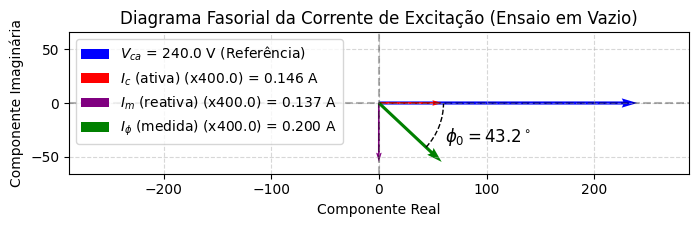



=== DESAFIO 4: Análise de Desempenho Sob Carga ===

--- Resultados Operacionais (para carga de 8 kVA, FP 0.7 atrasado) ---
Regulação de tensão: 2.86%
Eficiência em carga: 98.04%

Gerando diagrama fasorial da regulação de tensão (Análise do Desafio 4)...


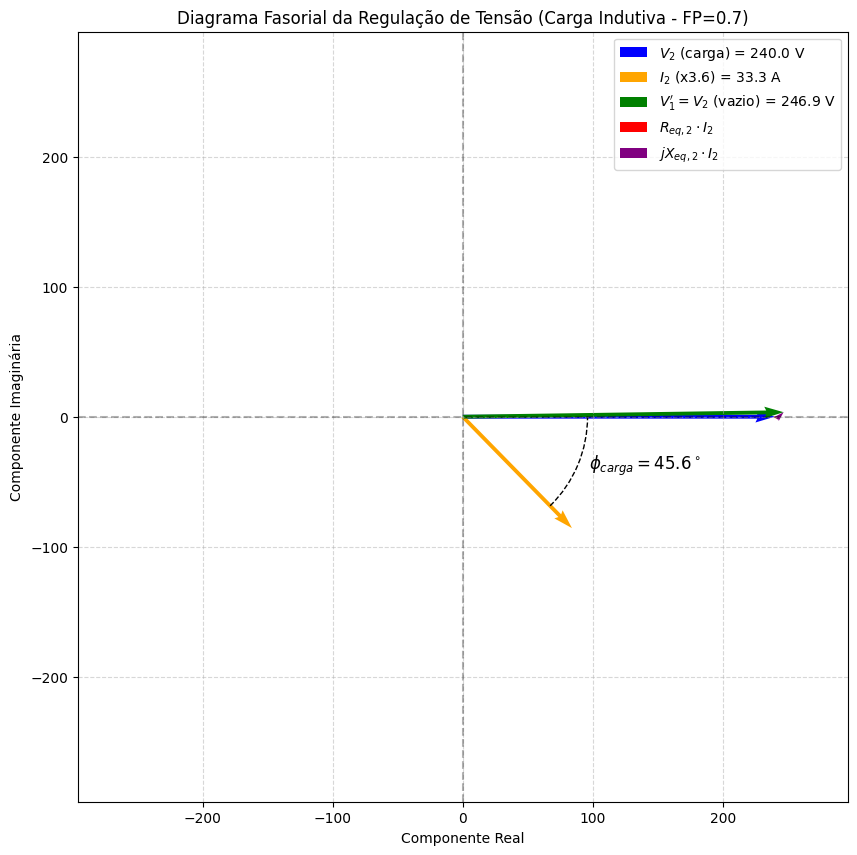

In [7]:
class AnaliseCarregamentoTransformador:
    """
    Realiza análise de desempenho do transformador sob diferentes condições de carga,
    incluindo cálculo de regulação de tensão e eficiência.
    """

    def __init__(self, parametros_transformador, fator_potencia=0.92, tipo_fator_potencia='atrasado', potencia_carga_kVA=None):
        self.parametros = parametros_transformador
        self.potencia_nominal = self.parametros['potencia_nominal']
        self.tensao_primaria_nominal = self.parametros['tensao_alta']
        self.tensao_secundaria_nominal = self.parametros['tensao_baixa']
        self.impedancia_equivalente = complex(
            self.parametros['resistencia_equivalente_alta'],
            self.parametros['reatancia_equivalente_alta']
        )
        self.fator_potencia = fator_potencia
        self.tipo_fator_potencia = tipo_fator_potencia.lower()
        self.potencia_carga = potencia_carga_kVA * 1e3 if potencia_carga_kVA is not None else self.potencia_nominal
        self.relacao_transformacao = self.parametros['relacao_transformacao']

        if self.tipo_fator_potencia not in ['atrasado', 'adiantado']:
            raise ValueError("tipo_fator_potencia deve ser 'atrasado' ou 'adiantado'")

    def calcular_corrente_secundaria(self):
        if not -1.0 <= self.fator_potencia <= 1.0:
            raise ValueError(f"Fator de Potência Inválido: {self.fator_potencia}. O valor deve estar entre -1.0 e 1.0.")
        modulo_corrente = self.potencia_carga / self.tensao_secundaria_nominal
        angulo = np.arccos(self.fator_potencia)
        if self.tipo_fator_potencia == 'atrasado':
            angulo = -angulo
        return cmath.rect(modulo_corrente, angulo)

    def calcular_tensao_sem_carga(self):
        impedancia_eq_baixa = self.impedancia_equivalente / (self.relacao_transformacao**2)
        corrente_secundaria = self.calcular_corrente_secundaria()
        tensao_plena_carga = self.tensao_secundaria_nominal
        return tensao_plena_carga + impedancia_eq_baixa * corrente_secundaria

    def calcular_regulacao_tensao(self):
        tensao_sem_carga = self.calcular_tensao_sem_carga()
        tensao_plena_carga = self.tensao_secundaria_nominal
        return (abs(tensao_sem_carga) - tensao_plena_carga) / tensao_plena_carga * 100

    def calcular_eficiencia(self):
        potencia_saida = self.potencia_carga * self.fator_potencia
        corrente_secundaria_modulo = self.potencia_carga / self.tensao_secundaria_nominal
        resistencia_eq_baixa = self.impedancia_equivalente.real / (self.relacao_transformacao**2)
        perdas_cobre = resistencia_eq_baixa * (corrente_secundaria_modulo ** 2)
        resistencia_nucleo_baixa = self.parametros['resistencia_nucleo_baixa']
        perdas_nucleo = (self.tensao_secundaria_nominal ** 2) / resistencia_nucleo_baixa
        potencia_entrada = potencia_saida + perdas_cobre + perdas_nucleo
        if potencia_entrada == 0:
            return 0
        return (potencia_saida / potencia_entrada) * 100

    def plotar_diagrama_fasorial_regulacao(self): # Renomeado para clareza
        """
        Gera diagrama fasorial para REGULAÇÃO DE TENSÃO, mostrando relações
        entre tensões e correntes sob condição de carga.
        Os fasores são referidos ao secundário.
        V2 (vazio) representa V1 referido ao secundário.
        """
        tensao_sec_vazio = self.calcular_tensao_sem_carga() # V1'
        corrente_sec = self.calcular_corrente_secundaria()  # I2
        tensao_sec_carga = complex(self.tensao_secundaria_nominal, 0) # V2

        impedancia_eq_baixa = self.impedancia_equivalente / (self.relacao_transformacao**2)

        queda_resistiva = impedancia_eq_baixa.real * corrente_sec # Req_sec * I2
        queda_indutiva = 1j * impedancia_eq_baixa.imag * corrente_sec # jXeq_sec * I2

        # --- FATOR DE ESCALA PARA CORRENTE (VISUALIZAÇÃO) ---
        if abs(corrente_sec) > 1e-6 : # Evita divisão por zero se corrente for nula
            fator_escala_corrente = abs(tensao_sec_carga) / (abs(corrente_sec) * 2) # Tenta deixar I2 com metade do tamanho de V2
        else:
            fator_escala_corrente = 1
        fator_escala_corrente = max(1, fator_escala_corrente) # Garante que não seja menor que 1

        origem = np.array([0, 0])
        v_carga_xy = np.array([tensao_sec_carga.real, tensao_sec_carga.imag])
        i_sec_xy_plot = np.array([corrente_sec.real * fator_escala_corrente, corrente_sec.imag * fator_escala_corrente])

        queda_r_xy = np.array([queda_resistiva.real, queda_resistiva.imag])
        queda_x_xy = np.array([queda_indutiva.real, queda_indutiva.imag])
        v_vazio_xy = np.array([tensao_sec_vazio.real, tensao_sec_vazio.imag])

        plt.figure(figsize=(10, 10))
        ax = plt.gca()

        plt.quiver(*origem, *v_carga_xy, angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label=f'$V_2$ (carga) = {abs(tensao_sec_carga):.1f} V')
        plt.quiver(*origem, *i_sec_xy_plot, angles='xy', scale_units='xy', scale=1, color='orange', width=0.005, label=f'$I_2$ (x{fator_escala_corrente:.1f}) = {abs(corrente_sec):.1f} A')
        plt.quiver(*origem, *v_vazio_xy, angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label=f'$V_1\' = V_2$ (vazio) = {abs(tensao_sec_vazio):.1f} V')

        plt.quiver(*v_carga_xy, *queda_r_xy, angles='xy', scale_units='xy', scale=1, color='red', width=0.003, label='$R_{{eq,2}} \cdot I_2$')
        plt.quiver(*(v_carga_xy + queda_r_xy), *queda_x_xy, angles='xy', scale_units='xy', scale=1, color='purple', width=0.003, label='$jX_{{eq,2}} \cdot I_2$')

        if abs(corrente_sec) > 0:
            angulo_fp_rad = cmath.phase(corrente_sec)
            angulo_fp_deg = np.degrees(angulo_fp_rad)
            raio_arco = abs(tensao_sec_carga) * 0.4
            theta1, theta2 = (angulo_fp_deg, 0) if angulo_fp_deg < 0 else (0, angulo_fp_deg)
            arco = Arc(origem, 2*raio_arco, 2*raio_arco, angle=0, theta1=theta1, theta2=theta2, color='k', linestyle='--')
            ax.add_patch(arco)
            angulo_texto_rad = angulo_fp_rad / 2
            plt.text(raio_arco * np.cos(angulo_texto_rad) * 1.1, raio_arco * np.sin(angulo_texto_rad) * 1.1, f'$\\phi_{{carga}} = {abs(angulo_fp_deg):.1f}^\\circ$', fontsize=12)

        limite_max_tensao = abs(tensao_sec_vazio) * 1.2
        # Ajustar limites para acomodar corrente escalada se necessário
        lim_corrente_real_plot = abs(i_sec_xy_plot[0]) * 1.2
        lim_corrente_imag_plot = abs(i_sec_xy_plot[1]) * 1.2

        lim_x_max = max(limite_max_tensao, lim_corrente_real_plot, abs(v_vazio_xy[0])*1.1, abs(v_carga_xy[0])*1.1)
        lim_y_max = max(limite_max_tensao, lim_corrente_imag_plot, abs(v_vazio_xy[1])*1.1, abs(v_carga_xy[1])*1.1)

        # Garante que os limites não sejam zero se todos os valores forem zero
        lim_x_max = lim_x_max if lim_x_max > 1e-6 else 1.0
        lim_y_max = lim_y_max if lim_y_max > 1e-6 else 1.0

        plt.xlim(-lim_x_max, lim_x_max)
        plt.ylim(-lim_y_max, lim_y_max)

        plt.axhline(0, color='k', linestyle='--', alpha=0.3)
        plt.axvline(0, color='k', linestyle='--', alpha=0.3)
        plt.grid(True, linestyle='--', alpha=0.5)

        tipo_carga_str = "Indutiva" if self.tipo_fator_potencia == 'atrasado' else "Capacitiva"
        plt.title(f'Diagrama Fasorial da Regulação de Tensão (Carga {tipo_carga_str} - FP={self.fator_potencia})')
        plt.xlabel('Componente Real')
        plt.ylabel('Componente Imaginária')
        plt.legend(loc='best')
        plt.gca().set_aspect('equal', adjustable='box')
        return plt

class AnaliseTransformadorMonofasico:
    def __init__(self, tensao_ca, corrente_ca, potencia_ca, tensao_cc, corrente_cc, potencia_cc,
                 tensao_baixa, tensao_alta, frequencia=60):
        self.tensao_ca, self.corrente_ca, self.potencia_ca = tensao_ca, corrente_ca, potencia_ca
        self.tensao_cc, self.corrente_cc, self.potencia_cc = tensao_cc, corrente_cc, potencia_cc
        self.tensao_baixa, self.tensao_alta = tensao_baixa, tensao_alta
        self.frequencia = frequencia
        self.relacao_transformacao = tensao_alta / tensao_baixa
        self.parametros = {}
        self.calcular_parametros()

    def calcular_parametros(self):
        # Ensaio em vazio (lado BT) - Parâmetros para DESAFIO 3
        self.Rc_BT = (self.tensao_ca ** 2) / self.potencia_ca

        # Impedância de excitação Z_phi = V_ca / I_ca (magnitude)
        # I_ca é a corrente de excitação I_phi
        if self.corrente_ca > 1e-9: # Evita divisão por zero
            self.Zphi_BT_mag = self.tensao_ca / self.corrente_ca
        else:
            self.Zphi_BT_mag = float('inf')

        # Corrente ativa do núcleo (Ic) e reativa (Im)
        self.Ic_BT = self.tensao_ca / self.Rc_BT

        # Cálculo de Xm_BT
        # S_ca_squared = (self.tensao_ca * self.corrente_ca)**2
        # P_ca_squared = self.potencia_ca**2
        # if S_ca_squared >= P_ca_squared:
        #     Q_ca = np.sqrt(S_ca_squared - P_ca_squared)
        #     self.Xm_BT = (self.tensao_ca**2) / Q_ca if Q_ca > 1e-9 else float('inf')
        # else: # P_ca > S_ca, dados inconsistentes, assumir Xm grande ou erro
        #     print(f"Aviso: Potência ativa P_ca ({self.potencia_ca}W) é maior que a potência aparente S_ca ({np.sqrt(S_ca_squared):.2f}VA) no ensaio em vazio.")
        #     self.Xm_BT = float('inf') # Ou outra forma de tratamento de erro

        # Método alternativo para Xm_BT usando admitâncias (como no original)
        Y_ca_mag = self.corrente_ca / self.tensao_ca if self.tensao_ca > 1e-9 else 0
        G_c_BT = 1 / self.Rc_BT if self.Rc_BT > 1e-9 else 0

        if Y_ca_mag**2 - G_c_BT**2 >= 0:
            Bm_BT = np.sqrt(Y_ca_mag**2 - G_c_BT**2)
            self.Xm_BT = 1 / Bm_BT if Bm_BT > 1e-9 else float('inf')
        else:
            # Pode acontecer devido a imprecisões de medição ou se Pca for muito próximo de Sca
            # print(f"Aviso: Y_ca_mag^2 ({Y_ca_mag**2:.4g}) < G_c_BT^2 ({G_c_BT**2:.4g}). Xm_BT será muito alto/infinito.")
            # Neste caso, Im seria muito pequeno. Se P_ca = V_ca*I_ca (FP=1 no vazio, irreal), então Q_ca=0, Xm=inf.
            # Se I_c^2 + I_m^2 = I_phi^2, então I_m = sqrt(I_phi^2 - I_c^2)
            if self.corrente_ca**2 >= self.Ic_BT**2:
                 Im_BT_calc = np.sqrt(self.corrente_ca**2 - self.Ic_BT**2)
                 self.Xm_BT = self.tensao_ca / Im_BT_calc if Im_BT_calc > 1e-9 else float('inf')
            else:
                # print(f"Aviso: Ic_BT ({self.Ic_BT:.4g}A) > I_phi ({self.corrente_ca:.4g}A). Impossível calcular Im e Xm_BT desta forma.")
                self.Xm_BT = float('inf') # Definir Xm como infinito se Im não puder ser calculado


        self.Im_BT = self.tensao_ca / self.Xm_BT if self.Xm_BT > 1e-9 and self.Xm_BT != float('inf') else 0


        # Ensaio em curto (lado AT) - Parâmetros para DESAFIO 4
        self.Req_AT = self.potencia_cc / (self.corrente_cc ** 2)
        Z_cc_mag = self.tensao_cc / self.corrente_cc

        if Z_cc_mag**2 - self.Req_AT**2 < 0:
            # print(f"Aviso: Z_cc_mag^2 ({Z_cc_mag**2:.4g}) < Req_AT^2 ({self.Req_AT**2:.4g}). Xeq_AT será zero.")
            self.Xeq_AT = 0
        else:
            self.Xeq_AT = np.sqrt(Z_cc_mag**2 - self.Req_AT**2)

        # Parâmetros DESAFIO 4: Rp, Xp, Rs, Xs
        # Assumindo que o primário é o lado de Alta Tensão (AT) e o secundário é Baixa Tensão (BT)
        # E que R1 = R2' e X1 = X2' (aproximação comum onde R1 é Rp, R2' é Rs referido ao primário)
        self.Rp_AT = self.Req_AT / 2  # Resistência do primário (AT)
        self.Xp_AT = self.Xeq_AT / 2  # Reatância do primário (AT)

        # Resistência do secundário (BT)
        self.Rs_BT = (self.Req_AT / 2) / (self.relacao_transformacao**2)
        # Reatância do secundário (BT)
        self.Xs_BT = (self.Xeq_AT / 2) / (self.relacao_transformacao**2)

        self.parametros = {
            'resistencia_nucleo_baixa': self.Rc_BT,          # Rc (BT)
            'reatancia_magnetizacao_baixa': self.Xm_BT,    # Xm (BT)
            'impedancia_excitacao_baixa_mag': self.Zphi_BT_mag, # Zphi (BT) - magnitude
            'corrente_nucleo_ativa_baixa': self.Ic_BT,     # Ic (BT)
            'corrente_magnetizacao_reativa_baixa': self.Im_BT, # Im (BT)

            'resistencia_equivalente_alta': self.Req_AT,
            'reatancia_equivalente_alta': self.Xeq_AT,

            'resistencia_primario_alta': self.Rp_AT,    # Rp (AT)
            'reatancia_primario_alta': self.Xp_AT,      # Xp (AT)
            'resistencia_secundario_baixa': self.Rs_BT, # Rs (BT)
            'reatancia_secundario_baixa': self.Xs_BT,   # Xs (BT)

            'relacao_transformacao': self.relacao_transformacao,
            'tensao_baixa': self.tensao_baixa,
            'tensao_alta': self.tensao_alta,
            'potencia_nominal': self.tensao_alta * self.corrente_cc # Estimativa baseada no ensaio CC
        }

    def obter_parametros(self):
        return self.parametros

    def imprimir_parametros(self):
        params = self.obter_parametros()
        a = params['relacao_transformacao']

        print("\n" + "="*70)
        print("PARÂMETROS DO TRANSFORMADOR MONOFÁSICO (Calculados)")
        print("="*70)

        print("\n--- DESAFIO 3: Parâmetros do Ramo de Excitação (Referidos ao Lado de Baixa) ---")
        print(f"Rc (Resistência de perdas no núcleo, BT): {params['resistencia_nucleo_baixa']:.2f} Ω")
        print(f"Xm (Reatância de magnetização, BT): {params['reatancia_magnetizacao_baixa'] if params['reatancia_magnetizacao_baixa'] != float('inf') else 'inf':.2f} Ω")
        print(f"Zphi (Impedância do circuito aberto, BT, magnitude): {params['impedancia_excitacao_baixa_mag'] if params['impedancia_excitacao_baixa_mag'] != float('inf') else 'inf':.2f} Ω")
        print(f"Ic (Corrente ativa do núcleo, BT): {params['corrente_nucleo_ativa_baixa'] * 1000:.2f} mA")
        print(f"Im (Corrente reativa do núcleo, BT): {params['corrente_magnetizacao_reativa_baixa'] * 1000:.2f} mA")

        res_nucleo_alta = params['resistencia_nucleo_baixa'] * a**2
        reat_mag_alta = params['reatancia_magnetizacao_baixa'] * a**2
        print(f"\n--- Parâmetros do Ramo de Excitação (Referidos ao Lado de Alta) ---")
        print(f"Resistência de perdas no núcleo (Rc_AT): {res_nucleo_alta/1000:.2f} kΩ")
        print(f"Reatância de magnetização (Xm_AT): {reat_mag_alta/1000 if reat_mag_alta != float('inf') else 'inf':.2f} kΩ")

        print("\n--- Parâmetros Série Equivalentes (Referidos ao Lado de Alta - Ensaio CC) ---")
        print(f"Resistência equivalente série (Req_AT): {params['resistencia_equivalente_alta']:.2f} Ω")
        print(f"Reatância equivalente série (Xeq_AT): {params['reatancia_equivalente_alta']:.2f} Ω")

        print("\n--- DESAFIO 4: Parâmetros dos Enrolamentos ---")
        print(f"Rp (Resistência do primário, lado AT): {params['resistencia_primario_alta']:.2f} Ω")
        print(f"Xp (Reatância de dispersão do primário, lado AT): {params['reatancia_primario_alta']:.2f} Ω")
        print(f"Rs (Resistência do secundário, lado BT): {params['resistencia_secundario_baixa']:.3f} Ω")
        print(f"Xs (Reatância de dispersão do secundário, lado BT): {params['reatancia_secundario_baixa']:.3f} Ω")

        print("\n--- Características Nominais (Baseadas nos Ensaios) ---")
        print(f"Relação de transformação (a = V_alta/V_baixa): {params['relacao_transformacao']:.2f}")

        print(f"Potência nominal aparente estimada (Sn_estimada): {params['potencia_nominal']/1000:.2f} kVA (Baseada em V_alta * I_cc)")


    def plotar_diagrama_fasorial_excitacao(self):
        """
        Gera diagrama fasorial da corrente de excitação (ensaio em vazio).
        Todos os valores são do lado de baixa tensão (BT).
        """
        origem = np.array([0,0]) # Definindo a origem aqui
        V_ca_fasor = complex(self.tensao_ca, 0)

        Ic_fasor = complex(self.Ic_BT, 0) # Em fase com V_ca
        Im_fasor = complex(0, -self.Im_BT) # 90 graus atrasada em relação a V_ca (indutivo)

        # Corrente total de excitação (Iphi) calculada
        Iphi_calculada_fasor = Ic_fasor + Im_fasor

        # Usar a corrente medida no ensaio e seu ângulo para Iphi_plotar
        fator_potencia_ca = self.potencia_ca / (self.tensao_ca * self.corrente_ca) if (self.tensao_ca * self.corrente_ca) > 0 else 0
        fator_potencia_ca = max(-1.0, min(1.0, fator_potencia_ca)) # Garante que o FP esteja no intervalo válido
        angulo_phi_ca_rad = -np.arccos(fator_potencia_ca) # Negativo, pois é predominantemente indutivo

        Iphi_medida_fasor = cmath.rect(self.corrente_ca, angulo_phi_ca_rad)
        Iphi_plotar_fasor = Iphi_medida_fasor # Usar a corrente medida para o plot

        # --- FATOR DE ESCALA PARA CORRENTES (VISUALIZAÇÃO) ---
        if abs(Iphi_plotar_fasor) > 1e-6:
            fator_escala = abs(V_ca_fasor) / (abs(Iphi_plotar_fasor) * 3)
        else:
            fator_escala = 1
        fator_escala = max(1, fator_escala)

        V_ref_xy = np.array([V_ca_fasor.real, V_ca_fasor.imag])
        Ic_xy_plot = np.array([Ic_fasor.real * fator_escala, Ic_fasor.imag * fator_escala])
        Im_xy_plot = np.array([Im_fasor.real * fator_escala, Im_fasor.imag * fator_escala])
        Iphi_xy_plot = np.array([Iphi_plotar_fasor.real * fator_escala, Iphi_plotar_fasor.imag * fator_escala])

        plt.figure(figsize=(8, 8))
        ax = plt.gca()

        plt.quiver(*origem, *V_ref_xy, angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label=f'$V_{{ca}}$ = {self.tensao_ca:.1f} V (Referência)')
        plt.quiver(*origem, *Ic_xy_plot, angles='xy', scale_units='xy', scale=1, color='red', width=0.003, label=f'$I_c$ (ativa) (x{fator_escala:.1f}) = {abs(Ic_fasor):.3f} A')
        plt.quiver(*origem, *Im_xy_plot, angles='xy', scale_units='xy', scale=1, color='purple', width=0.003, label=f'$I_m$ (reativa) (x{fator_escala:.1f}) = {abs(Im_fasor):.3f} A')
        plt.quiver(*origem, *Iphi_xy_plot, angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label=f'$I_{{\phi}}$ (medida) (x{fator_escala:.1f}) = {abs(Iphi_plotar_fasor):.3f} A')

        angulo_phi0_deg = np.degrees(angulo_phi_ca_rad)
        raio_arco_phi0 = abs(V_ca_fasor) * 0.25

        theta1_phi0, theta2_phi0 = (angulo_phi0_deg, 0) if angulo_phi0_deg < 0 else (0, angulo_phi0_deg)
        arco_phi0 = Arc(origem, 2*raio_arco_phi0, 2*raio_arco_phi0, angle=0, theta1=theta1_phi0, theta2=theta2_phi0, color='k', linestyle='--')
        ax.add_patch(arco_phi0)
        angulo_texto_rad_phi0 = angulo_phi_ca_rad / 2
        plt.text(raio_arco_phi0 * np.cos(angulo_texto_rad_phi0) * 1.1,
                 raio_arco_phi0 * np.sin(angulo_texto_rad_phi0) * 1.1 - (0.05 * abs(V_ca_fasor)),
                 f'$\\phi_0 = {abs(angulo_phi0_deg):.1f}^\\circ$', fontsize=12)

        lim_tensao_real = abs(V_ref_xy[0]) * 1.2
        lim_tensao_imag = abs(V_ref_xy[1]) * 1.2 # Embora V_ref_xy[1] seja 0, para generalizar

        lim_corrente_real_plot = abs(Iphi_xy_plot[0]) * 1.2
        lim_corrente_imag_plot = abs(Iphi_xy_plot[1]) * 1.2

        lim_x = max(lim_tensao_real, lim_corrente_real_plot, abs(Ic_xy_plot[0])*1.1, abs(Im_xy_plot[0])*1.1)
        lim_y = max(lim_tensao_imag, lim_corrente_imag_plot, abs(Ic_xy_plot[1])*1.1, abs(Im_xy_plot[1])*1.1)

        # Garante que os limites não sejam zero se todos os valores forem zero
        lim_x = lim_x if lim_x > 1e-6 else 1.0
        lim_y = lim_y if lim_y > 1e-6 else 1.0

        # Se o eixo imaginário tiver pouca variação (ex: só Im), dar um pouco de espaço
        if lim_y < 0.1 * lim_x and lim_x > 1e-6 : lim_y = 0.5 * lim_x
        if lim_x < 0.1 * lim_y and lim_y > 1e-6 : lim_x = 0.5 * lim_y


        plt.xlim(-lim_x, lim_x)
        plt.ylim(-lim_y, lim_y)
        plt.axhline(0, color='k', linestyle='--', alpha=0.3)
        plt.axvline(0, color='k', linestyle='--', alpha=0.3)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.title('Diagrama Fasorial da Corrente de Excitação (Ensaio em Vazio)')
        plt.xlabel('Componente Real')
        plt.ylabel('Componente Imaginária')
        plt.legend(loc='best')
        plt.gca().set_aspect('equal', adjustable='box')
        return plt

def main():
    print("\n=== DESAFIO 3 & 4: Determinação de Parâmetros e Análise ===")
    transformador = AnaliseTransformadorMonofasico(
        tensao_ca=240,      # V_vazio (BT)
        corrente_ca=0.2,    # I_vazio (BT)
        potencia_ca=35,     # P_vazio (BT)
        tensao_cc=528,      # V_curto (AT) - Tensão aplicada no lado AT, secundário em curto
        corrente_cc=0.757,  # I_curto (AT) - Corrente medida no lado AT
        potencia_cc=120,    # P_curto (AT) - Potência medida no lado AT
        tensao_baixa=240,   # V_nominal_BT
        tensao_alta=13200   # V_nominal_AT
    )
    transformador.imprimir_parametros() # Inclui saídas do DESAFIO 3 e DESAFIO 4

    print("\nGerando diagrama fasorial da corrente de excitação (Parâmetros do Desafio 3)...")
    plot_excitacao = transformador.plotar_diagrama_fasorial_excitacao()
    plot_excitacao.show()

    parametros_calculados = transformador.obter_parametros()

    print("\n\n=== DESAFIO 4: Análise de Desempenho Sob Carga ===")
    transformador_carregado = AnaliseCarregamentoTransformador(
        parametros_transformador=parametros_calculados, # Usa os parâmetros calculados anteriormente
        fator_potencia=0.7,
        tipo_fator_potencia='atrasado',
        potencia_carga_kVA=8 # Carga específica de 8kVA
    )

    print("\n--- Resultados Operacionais (para carga de 8 kVA, FP 0.7 atrasado) ---")
    print(f"Regulação de tensão: {transformador_carregado.calcular_regulacao_tensao():.2f}%")
    print(f"Eficiência em carga: {transformador_carregado.calcular_eficiencia():.2f}%")

    print("\nGerando diagrama fasorial da regulação de tensão (Análise do Desafio 4)...")
    plot_regulacao = transformador_carregado.plotar_diagrama_fasorial_regulacao()
    plot_regulacao.show()

if __name__ == "__main__":
    main()